# Table of Contents
1. [Introduction](#INTRO)
2. [Requirments](#DP)
3. [Models](#DNN)<br>
3.1 [Sequnce to Sequence Prediction](#Seq)<br>
3.1.1 [ConvNET](#SeqConvNet)<br>
3.1.2 [ConvNET + Bidirectional LSTM RNN](#SeqConvNetLSTM)<br>
3.1.3 [Denoising AutoEncoder](#SeqDA)<br>
3.1.4 [Denoising Autoencoder + LSTM RNN](#SeqDALSTM)<br>
3.1.5 [Parallel ConvNETs](#SeqParallelConvNet)<br>
3.1.6 [Parallel CNN with Bidirectional LSTM RNN](#SeqParallelConvNetLSTM)<br>
3.2 [Sequence to Points Prediction](#3P)<br>
    3.2.1 [ConvNET](#ConvNet)<br>
    3.2.2 [ConvNET + Bidirectional LSTM RNN](#ConvNetLSTM)<br>
    3.2.3 [Parallel ConvNETs](#ParallelConvNet)<br>
    3.1.4 [Parallel CNN with Bidirectional LSTM RNN](#ParallelConvNetLSTM)<br>   
3. [Accuracy Metrics](#Error)<br>
4. [Example (How to run?)](#Example)<br>
5. [Results](#ACC)<br>

### 1. Introduction
<a id="INTRO"></a>


Disaggregation is the task of determining the appliances’ individual electricity consumption from the aggregate power consumption through signal processing and machine learning strategies. It allows us to provide detailed consumption feedback to the users (tenants), to induce them to modify their habits towards a wiser use of electricity. 

Here, we explored different neural network architectures using bidirectional LSTM networks,
convolutional neural networks, and feed-forward deep neural networks. Two learning
types are investigated: (i) sequence-to-sequence learning, where the input is a window of the apartment-level electricity
consumption data and the output is a sequence of appliance electricity consumption data with the same
resolution; and (ii) sequence-to-points learning, where the input is a window of the apartment-level
electricity consumption data and the output is start time, end time, and average electricity consumption
data from the target appliance. To evaluate the performance of models on aggregate power data, we
used four metrics, including mean absolute error, precision, recall, and F-score.

### 2. Requirments
<a id="DP"></a>

- Required packages and their versions are listed 
    [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/Requirments.txt)

### 3. Models <a id="DNN"></a>
#### 3.1 Sequnce To Sequnce Prediction<a id="Seq"></a>
###### 3.1.1 ConvNET <a id="SeqConvNet"></a>
The general network topology of this model is illustrated below. It starts from two one-dimensional convolutional layers that extracts important features from the input signals. Each convolution layer is followed by a ReLU activation function and by additional convolutional. Finally, two fully connected layers followed by a ReLU activation function.

<img src="SeqConNet.jpg" alt="Drawing" style="width: 350px;"/>
The model is called <b>ConvNNSeq</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNSeq.py)

###### 3.1.2 ConvNET with Bidirectional LSTM RNN <a id="SeqConvNetLSTM"></a>
The general network topology of this model is illustrated below. It starts from one one-dimensional convolutional layer that extracts important features from the input signals. The convolution layer is followed by a ReLU activation function. After the convolutioal layer, a bidirection Long Short-Term Memory recurrent NN (bi-LSTM) layer with a tanh activation function is added to perform the sequence analysis on the extracted data. Finally, two fully connected layers followed by a ReLU activation function. <b>This structure contains two parts, CNN and RNN, for spatial and temporal feature extraction respectively.</b> 

<img src="SeqConNetLSTM.png" alt="Drawing" style="width: 350px;"/>
The model is called <b>ConvNNLSTMSeq</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNLSTMSeq.py)

###### 3.1.3 Denoising Autoencoder <a id="SeqDA"></a>

The idea behind a denoising autoencoder is to learn a representation that is robust to noise. We add noise to the appliances’ individual electricity consumption and then feed this noisy signal as an input to our network. Here the nosiy signal is the aggregate power consumption. The encoder part of the autoencoder transforms the input signal into a different space that preserves the important features but removes the noise. The decoder part of the network then reconstructs the the appliances’ individual electricity consumption (or the original signal).

The general network topology of this model is illustrated below. The encoder network is composed of one one-dimensional convolutional layers that process the input signal and produce a set of feature maps. Each convolutional layer is followed by a linear activation function. One fully connected layers followed by a ReLU activation function closes the encoder network. The encoder network is composed of one one-dimensional convolutional layers that process the input signal and produce a set of feature maps. Each convolutional layer is followed by a linear activation function. One fully connected layers followed by a ReLU activation function closes the encoder network. The decoder is structured specularly to the encoder.

<img src="SeqDA.png" alt="Drawing" style="width: 350px;"/>
The model is called <b>DAutoEncoder</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/DAutoEncoder.py)

###### 3.1.4 Denoising Autoencoder with Bidirectional LSTM Neural Networks<a id="SeqDALSTM"></a>

The general structure of Denoising Autoencoder with memory-enhanced neural networks is illustrated below. It includes an input layer (encoder), an output layer (decoder),and A hidden den layers that is constructed using LSTM units.


<img src="SeqDALSTM.png" alt="Drawing" style="width: 350px;"/>
The model is called <b>DAutoEncoderLSTM</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/DAutoEncoderLSTM.py)

###### 3.1.5 Parallel ConvNETs<a id="SeqParallelConvNet"></a>

The structure of the parallel convolutional networks is illustrated below. In this topology, the CNN layers extracts the spatial features of aggregated signals in parallel and fuses the extracted features to fully connected layers. 

<img src="SeqParallelConvNet.png" alt="Drawing" style="width: 650px;"/>
The model is called <b>ConvNNParallelSeq</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNParallelSeq.py)

###### 3.1.6 Cascade Parallel CNN LSTM<a id="SeqParallelConvNetLSTM"></a>

The structure of the Cascade Parallel CNN LSTM architecture is shown below. In this structure, the parallel layers extract the spatial features and the LSTM layer extracts temporal features of the aggregated signals. The extracted features are then transferred to the fully connected layer.

<img src="SeqParallelConvNetLSTM.png" alt="Drawing" style="width: 650px;"/>
The model is called <b>ConvNNParallelLSTMSeq</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNParallelLSTMSeq.py)

#### 3.2 Sequence to Points Prediction<a id="3P"></a>
###### 3.2.1 ConvNET <a id="ConvNet"></a>
The general network topology of this model is illustrated below. It starts from two one-dimensional convolutional layers that extracts important features from the input signals. Each convolution layer is followed by a ReLU activation function and by additional convolutional. Finally, two fully connected layers followed by a ReLU activation function.

<img src="3ValConNet.png" alt="Drawing" style="width: 350px;"/>
The model is called <b>ConvNN</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNN.py)

###### 3.2.1 ConvNET with Bidirectional LSTM RNN <a id="ConvNetLSTM"></a>
The general network topology of this model is illustrated below. In this structure CNN layer extracts spatial features and LSTM RNN extracts temporal features. 

<img src="3ValConNetLSTM.png" alt="Drawing" style="width: 350px;"/>
The model is called <b>ConvNNLSTM</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNLSTM.py)

###### 3.2.1 Parallel ConvNETs <a id="ParallelConvNet"></a>

The structure of the parallel convolutional networks is illustrated below. In this topology, the CNN layers extracts the spatial features of aggregated signals in parallel and fuses the extracted features to fully connected layers. 

<img src="3ValParaConNet.png" alt="Drawing" style="width: 650px;"/>
The model is called <b>ConvNNParallel</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNParallel.py)

###### 3.2.1 Parallel CNN with Bidirectional LSTM RNN <a id="ParallelConvNetLSTM"></a>

The structure of the Cascade Parallel CNN LSTM architecture is shown below. In this structure, the parallel layers extract the spatial features and the LSTM layer extracts temporal features of the aggregated signals. The extracted features are then transferred to the fully connected layer.

<img src="3ValParaConNetLSTM.png" alt="Drawing" style="width: 650px;"/>
The model is called <b>ConvNNParallelLSTM</b>, and the source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/ConvNNParallelLSTMSeq.py)

### 4. Accuracy metrics <a id="Error"></a>
- Total energy correctly assigned to individual devices:<br>
$ACC=1-\frac{|\sum_{t=1}^{T}\hat{Y}_{applience}(t)-Y_{applience}(t)|}{\sum_{t=1}^{T}Y_{total}(t)}$<br>
$Y_{applience}$: Observed<br>
$\hat{Y}_{applience}$: Predicted<br>

- Precision, Recall, and F_measure of detected events:<br>
$Precision=\frac{tp}{tp+fp}$<br>
$Recall = \frac{tp}{tp+fn}$<br>
$Fscore = \frac{2\times Precision \times Recall}{Precision+Recall}$<br>

- The source code is provided [here](https://github.com/mehmani/MFRED-DisAgV01/blob/master/score_sequence_other.py)


### 5. Example <a id="Example"></a>

- Example 1. Sequence To Sequence Prediction:<br>
  
  Aggregate data is from unseen house 3, and the applience target is dishwasher. 

In [7]:
# Model
Model=DAutoEncoder
%run RequiredFunctions.ipynb
# Target Applience:
appliance = 'dish washer'
# Target House
House = 3

In [2]:
xtrain_seq,ytrain_seq,xvalid_seq,yvalid_seq,xtest_seq,ytest_seq = load_data_sequence(appliance,House)
ytrain_seq = reshape_y(ytrain_seq)
yvalid_seq = reshape_y(yvalid_seq)
ytest_seq = reshape_y(ytest_seq)
print(xtrain_seq.shape,yvalid_seq.shape,ytrain_seq.shape,ytest_seq.shape)

(14992, 512, 1) (3200, 512) (14992, 512) (9600, 512)


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 512, 8)            40        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              528384    
__________

Epoch 28/120
14992/14992 [==============================] - 3s 191us/step - loss: 0.0286 - val_loss: 0.0546
Epoch 29/120
14992/14992 [==============================] - 3s 189us/step - loss: 0.0278 - val_loss: 0.0507
Epoch 30/120
14992/14992 [==============================] - 3s 188us/step - loss: 0.0274 - val_loss: 0.0522
Epoch 31/120
14992/14992 [==============================] - 3s 190us/step - loss: 0.0270 - val_loss: 0.0512
Epoch 32/120
14992/14992 [==============================] - 3s 189us/step - loss: 0.0265 - val_loss: 0.0518
Epoch 33/120
14992/14992 [==============================] - 3s 191us/step - loss: 0.0275 - val_loss: 0.0531
Epoch 34/120
14992/14992 [==============================] - 3s 189us/step - loss: 0.0269 - val_loss: 0.0529
Epoch 35/120
14992/14992 [==============================] - 3s 189us/step - loss: 0.0293 - val_loss: 0.0584
Epoch 36/120
14992/14992 [==============================] - 3s 190us/step - loss: 0.0278 - val_loss: 0.0556
Epoch 37/120
14992/14992 [==

14992/14992 [==============================] - 3s 193us/step - loss: 0.0139 - val_loss: 0.0562
Epoch 105/120
14992/14992 [==============================] - 3s 193us/step - loss: 0.0138 - val_loss: 0.0556
Epoch 106/120
14992/14992 [==============================] - 3s 189us/step - loss: 0.0134 - val_loss: 0.0545
Epoch 107/120
14992/14992 [==============================] - 3s 190us/step - loss: 0.0133 - val_loss: 0.0574
Epoch 108/120
14992/14992 [==============================] - 3s 201us/step - loss: 0.0137 - val_loss: 0.0591
Epoch 109/120
14992/14992 [==============================] - 3s 202us/step - loss: 0.0135 - val_loss: 0.0578
Epoch 110/120
14992/14992 [==============================] - 3s 202us/step - loss: 0.0138 - val_loss: 0.0600
Epoch 111/120
14992/14992 [==============================] - 3s 192us/step - loss: 0.0141 - val_loss: 0.0576
Epoch 112/120
14992/14992 [==============================] - 3s 191us/step - loss: 0.0138 - val_loss: 0.0605
Epoch 113/120
14992/14992 [======

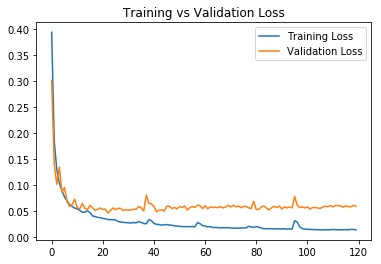

C:\Users\alime\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alime\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


{'precision': 0.81344304767253539, 'f1_score': 0.85807919067263472, 'accuracy': 0.91666239420572915, 'recall_score': 0.95060079773895534}


(array([ 0.91666239,  0.81344305,  0.9506008 ,  0.85807919]),
 {'accuracy': 0.91666239420572915,
  'f1_score': 0.85807919067263472,
  'precision': 0.81344304767253539,
  'recall_score': 0.95060079773895534})

In [3]:
create_fit_predict_seq(Model,'model_4_seq{}'.format(appliance),
                   [xtrain_seq,ytrain_seq],[xvalid_seq,yvalid_seq],[xtest_seq,ytest_seq],
                   epochs=120,batch_size=128)

##### Example 2. Sequence-to-Start-Midle-End Prediction:<br>
Model = ConvNN<br>
Aggregate data is from unseen house 3, and the applience target is washing machine. 

In [18]:
Model=ConvNN
# Target Applience:
appliance = 'washing machine'  
# Target House
House = 3
xtrain,ytrain,xvalid,yvalid,xtest,ytest = load_data(appliance,House)
print(xtrain.shape,yvalid.shape,ytrain.shape,ytest.shape)

(14992, 512, 1) (3200, 3) (14992, 3) (9600, 3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 512, 1)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 510, 16)           64        
_________________________________________________________________
flatten_9 (Flatten)          (None, 8160)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 2000)              16322000  
_________________________________________________________________
dropout_7 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               1024512   
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 1539      
Total para

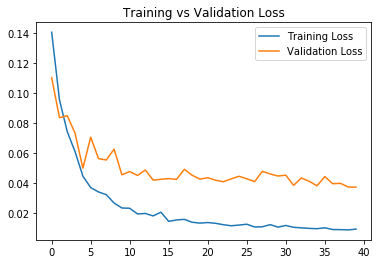

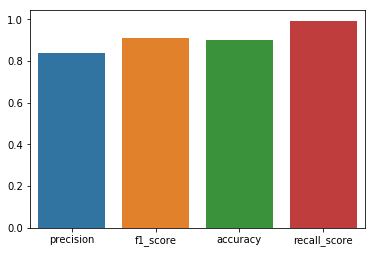

{'accuracy': 0.90260416666666665,
 'f1_score': 0.90989688734701735,
 'precision': 0.83943812233285919,
 'recall_score': 0.99326741005680619}

In [19]:
create_fit_predict(Model,'model_1_{}.h5'.format(appliance),
                   [xtrain,ytrain],[xvalid,yvalid],[xtest,ytest],
                   epochs=40,batch_size=16)

### 6. Results
Disaggregation performance of on a hold-out house (a house not seen during training)
##### 6.1 Seq-to-Seq

<img src="Result1.jpg" alt="Drawing" style="width: 550px;"/>

##### 6.2 Seq-to-Points

<img src="Result2.png" alt="Drawing" style="width: 550px;"/>